# Task

Analyze the data and note your insights in a report. 

Ask yourself what makes sense and what doesn’t, in general and especially around Lot Area and contrasting Property ID and Account ID. 

How would you approach and conduct an analysis of the data? Mind you, this exercise doesn’t have a single right answer, but many right questions! 

Describe your train of thoughts and assumptions clearly and provide a report on your analysis. There is no minimum or maximum number of pages.



# Imports

In [17]:
import pandas as pd

import numpy as np

import seaborn as sns

from scipy import stats

import matplotlib.pyplot as plt

import matplotlib.mlab as mlab

import matplotlib

plt.style.use('ggplot')

from matplotlib.pyplot import figure

# Import the Data

The data I received is from the excel file Scranton MLS Case.
 
The data has 4 columns: Property ID, Account ID, CitySupplied LotArea, LotArea in SMLS's System.
 
The Property ID is a field that uniquely identifies a PROPERTY in Scranton and is also used in the SMLS database.

Account ID refers to the City's tax roll number, uniquely identifying an ACCOUNT from which tax is levied. 

The Lot Area is also something the City of Scranton collects for their needs, such as property tax calculations 

The SMLS System numbers should be created similarly to the Lot Area, but is not created by the city. MLS is created, maintained, and paid for by real estate professionals to help their clients buy and sell property.
 https://www.nar.realtor/nar-doj-settlement/multiple-listing-service-mls-what-is-it 


In [22]:
df = pd.read_excel (r'C:\Users\jessv\Downloads\Scranton MLS Case1.xlsx')
print (df)

       Property ID  Account ID  CitySupplied LotArea  LotArea in SMLS's System
0         21096855     1103522          643755.11913                 643450.00
1         21086004     1103944          636826.65300                 637501.30
2         21086004     1103944          636826.65300                       NaN
3         21086004     1103944          636826.65300                       NaN
4         21086004     1103944          636826.65300                       NaN
...            ...         ...                   ...                       ...
64699     24046906     3867934               0.20900                     29.00
64700     29530335     9999788               0.14000                     34.32
64701     30680516    10024914               0.13900                     15.00
64702     30680516    10024914               0.13900                     15.00
64703     32412207    10090113               0.00000                     75.29

[64704 rows x 4 columns]


Data Attributes

In [23]:
print(type(df), df.shape, df.columns, df.info(), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64704 entries, 0 to 64703
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Property ID               64704 non-null  int64  
 1   Account ID                64704 non-null  int64  
 2   CitySupplied LotArea      64704 non-null  float64
 3   LotArea in SMLS's System  7906 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 2.0 MB
<class 'pandas.core.frame.DataFrame'> (64704, 4) Index(['Property ID', 'Account ID', 'CitySupplied LotArea',
       'LotArea in SMLS's System'],
      dtype='object') None         Property ID    Account ID  CitySupplied LotArea  \
count  6.470400e+04  6.470400e+04          64704.000000   
mean   2.613358e+07  8.082254e+06            576.661956   
std    9.090318e+06  3.119158e+06           9094.611446   
min    1.000006e+07  1.001908e+06              0.000000   
25%    1.618488e+07  5.518440e+06            

There are multiple missing fields in the final column. 
Visualize the missing data.

<AxesSubplot:>

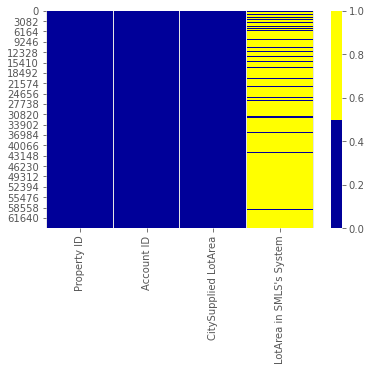

In [24]:
cols = df.columns[:30] # first 30 columns


colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.

sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [25]:
# % of missing.

for col in df.columns:

    pct_missing = np.mean(df[col].isnull())

    print('{} - {}%'.format(col, round(pct_missing*100)))

Property ID - 0%
Account ID - 0%
CitySupplied LotArea - 0%
LotArea in SMLS's System - 88%


Looking for correlations between fields

In [26]:
'''Correlations between variables'''
correlation_Scranton = df.corr()
print(correlation_Scranton)

                          Property ID  Account ID  CitySupplied LotArea  \
Property ID                  1.000000    0.808792             -0.018008   
Account ID                   0.808792    1.000000             -0.058237   
CitySupplied LotArea        -0.018008   -0.058237              1.000000   
LotArea in SMLS's System     0.006257    0.009064              0.001868   

                          LotArea in SMLS's System  
Property ID                               0.006257  
Account ID                                0.009064  
CitySupplied LotArea                      0.001868  
LotArea in SMLS's System                  1.000000  


Begin to clean the data.
Drop nulls.

In [27]:
df_nona=df.dropna()
df_nona

,Property ID,Account ID,CitySupplied LotArea,LotArea in SMLS's System
0,21096855,1103522,643755.11913,643450.00
1,21086004,1103944,636826.65300,637501.30
5,30124359,1103951,627867.42112,0.00
7,32174815,1105352,508632.55503,509.90
8,35610872,10395269,352001.04500,351992.86
...,...,...,...,...
64699,24046906,3867934,0.20900,29.00
64700,29530335,9999788,0.14000,34.32
64701,30680516,10024914,0.13900,15.00
64702,30680516,10024914,0.13900,15.00


In [28]:
'''Correlations between variables with removed NAN'''
correlation_Scranton_nona = df_nona.corr()
print(correlation_Scranton_nona)

                          Property ID  Account ID  CitySupplied LotArea  \
Property ID                  1.000000    0.741290              0.007227   
Account ID                   0.741290    1.000000             -0.095154   
CitySupplied LotArea         0.007227   -0.095154              1.000000   
LotArea in SMLS's System     0.006257    0.009064              0.001868   

                          LotArea in SMLS's System  
Property ID                               0.006257  
Account ID                                0.009064  
CitySupplied LotArea                      0.001868  
LotArea in SMLS's System                  1.000000  


The correlations between the 3rd and 4th columns should be related. They both are dealing with the lot sizes of properites.

Look at the duplicated rows.

In [29]:
df_nona.duplicated()

0        False
1        False
5        False
7        False
8        False
         ...  
64699    False
64700    False
64701    False
64702     True
64703    False
Length: 7906, dtype: bool

In [30]:
df_nona.duplicated().sum()

1960

Drop the duplicated rows.

In [31]:
df_dropped_nona=df_nona.drop_duplicates()
df_dropped_nona

,Property ID,Account ID,CitySupplied LotArea,LotArea in SMLS's System
0,21096855,1103522,643755.11913,643450.00
1,21086004,1103944,636826.65300,637501.30
5,30124359,1103951,627867.42112,0.00
7,32174815,1105352,508632.55503,509.90
8,35610872,10395269,352001.04500,351992.86
...,...,...,...,...
64698,14133060,3911377,0.27400,34.25
64699,24046906,3867934,0.20900,29.00
64700,29530335,9999788,0.14000,34.32
64701,30680516,10024914,0.13900,15.00


Look for missing data.

In [46]:
# % of missing.

for col in df_dropped_nona.columns:

    pct_missing = np.mean(df_dropped_nona[col].isnull())

    print('{} - {}%'.format(col, round(pct_missing*100)))

Property ID - 0%
Account ID - 0%
CitySupplied LotArea - 0%
LotArea in SMLS's System - 0%


In [37]:
'''Correlations between variables with removed NAN'''
correlation_Scranton_nona = df_dropped_nona.corr()
print(correlation_Scranton_nona)

                          Property ID  Account ID  CitySupplied LotArea  \
Property ID                  1.000000    0.751118              0.001678   
Account ID                   0.751118    1.000000             -0.096825   
CitySupplied LotArea         0.001678   -0.096825              1.000000   
LotArea in SMLS's System     0.006196    0.009739              0.001411   

                          LotArea in SMLS's System  
Property ID                               0.006196  
Account ID                                0.009739  
CitySupplied LotArea                      0.001411  
LotArea in SMLS's System                  1.000000  


Relook at data and its attributes.

In [38]:
df_dropped_nona

,Property ID,Account ID,CitySupplied LotArea,LotArea in SMLS's System
0,21096855,1103522,643755.11913,643450.00
1,21086004,1103944,636826.65300,637501.30
5,30124359,1103951,627867.42112,0.00
7,32174815,1105352,508632.55503,509.90
8,35610872,10395269,352001.04500,351992.86
...,...,...,...,...
64698,14133060,3911377,0.27400,34.25
64699,24046906,3867934,0.20900,29.00
64700,29530335,9999788,0.14000,34.32
64701,30680516,10024914,0.13900,15.00


In [39]:
print(type(df_dropped_nona), df_dropped_nona.shape, df_dropped_nona.columns, df_dropped_nona.info(), df_dropped_nona.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5946 entries, 0 to 64703
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Property ID               5946 non-null   int64  
 1   Account ID                5946 non-null   int64  
 2   CitySupplied LotArea      5946 non-null   float64
 3   LotArea in SMLS's System  5946 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 232.3 KB
<class 'pandas.core.frame.DataFrame'> (5946, 4) Index(['Property ID', 'Account ID', 'CitySupplied LotArea',
       'LotArea in SMLS's System'],
      dtype='object') None         Property ID    Account ID  CitySupplied LotArea  \
count  5.946000e+03  5.946000e+03           5946.000000   
mean   2.359777e+07  7.460173e+06           1817.799634   
std    9.022684e+06  3.236755e+06          21219.040190   
min    1.000746e+07  1.003789e+06              0.000000   
25%    1.518544e+07  4.221263e+06            

Look for outliers

<AxesSubplot:>

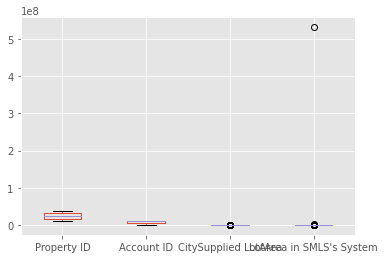

In [40]:
df_dropped_nona.boxplot()

<AxesSubplot:>

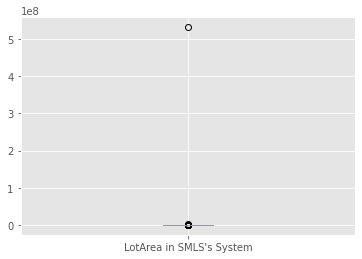

In [47]:
df.boxplot(column="LotArea in SMLS's System", return_type='axes')

In [41]:
df_dropped_nona_no0=df_dropped_nona.loc[(df_dropped_nona!=0).any(axis=1)]
df_dropped_nona_no0

,Property ID,Account ID,CitySupplied LotArea,LotArea in SMLS's System
0,21096855,1103522,643755.11913,643450.00
1,21086004,1103944,636826.65300,637501.30
5,30124359,1103951,627867.42112,0.00
7,32174815,1105352,508632.55503,509.90
8,35610872,10395269,352001.04500,351992.86
...,...,...,...,...
64698,14133060,3911377,0.27400,34.25
64699,24046906,3867934,0.20900,29.00
64700,29530335,9999788,0.14000,34.32
64701,30680516,10024914,0.13900,15.00


Drop outliers

In [42]:
z_scores = stats.zscore(df_dropped_nona_no0)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df_dropped_nona_no0[filtered_entries]
new_df

,Property ID,Account ID,CitySupplied LotArea,LotArea in SMLS's System
62,19857721,1129030,54595.49700,104536.93
74,19857721,1129030,54595.49700,135731.56
77,32174823,10084007,52597.70815,509903.91
79,14130421,5242904,44092.49300,44090.00
80,14952287,1129063,42235.67200,3341.98
...,...,...,...,...
64698,14133060,3911377,0.27400,34.25
64699,24046906,3867934,0.20900,29.00
64700,29530335,9999788,0.14000,34.32
64701,30680516,10024914,0.13900,15.00


In [43]:
new_df.describe()

,Property ID,Account ID,CitySupplied LotArea,LotArea in SMLS's System
count,5.917000e+03,5.917000e+03,5917.000000,5.917000e+03
mean,2.359698e+07,7.481206e+06,606.969018,3.129446e+03
std,9.031307e+06,3.220589e+06,1868.222027,4.019111e+04
min,1.000746e+07,1.003789e+06,0.000000,0.000000e+00
25%,1.517958e+07,4.230678e+06,318.458000,3.175000e+02
50%,2.445890e+07,9.462623e+06,441.839000,4.581400e+02
75%,3.201386e+07,1.006708e+07,610.512000,6.319000e+02
max,3.738448e+07,1.084211e+07,54595.497000,1.505327e+06


<AxesSubplot:>

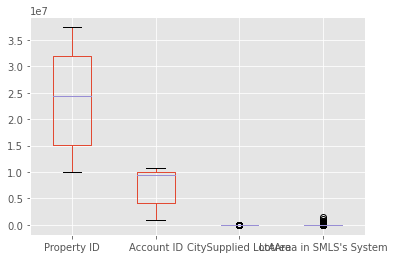

In [44]:
new_df.boxplot()

<AxesSubplot:>

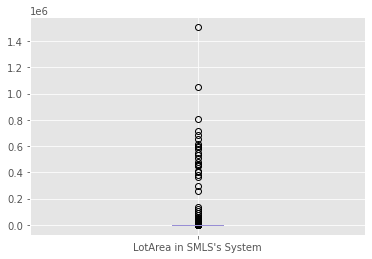

In [52]:
new_df.boxplot(column=["LotArea in SMLS's System"], return_type='axes')

<AxesSubplot:>

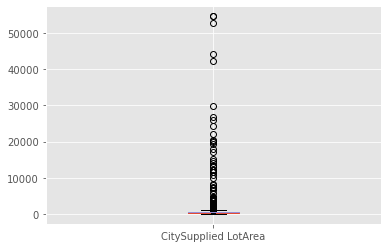

In [53]:
new_df.boxplot(column=["CitySupplied LotArea"], return_type='axes')

Create a scatterplot to look at the data and its correlation

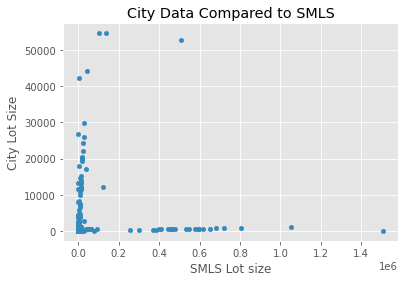

In [45]:
new_df.plot( y='CitySupplied LotArea', x="LotArea in SMLS's System" , kind="scatter" )
plt.title("City Data Compared to SMLS")
plt.ylabel("City Lot Size")
plt.xlabel("SMLS Lot size")
plt.show()

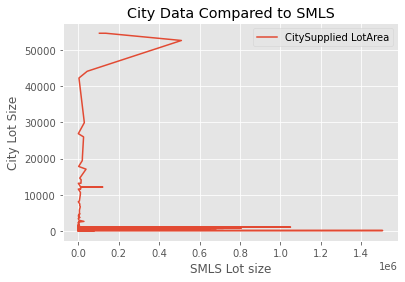

In [54]:
new_df.plot( y='CitySupplied LotArea', x="LotArea in SMLS's System" , kind="line" )
plt.title("City Data Compared to SMLS")
plt.ylabel("City Lot Size")
plt.xlabel("SMLS Lot size")
plt.show()

# Quick Analysis

There are 64,704 rows of data listed in this database. “LotArea in SMLS's System” is the only column with missing fields. 85% of “LotArea in SMLS's System” fields are blank, showing a “NAN” field in our system.  
 
When viewing the database, we can see multiple duplicate rows in the data. This may have happened due to mergers, or repeat listings of properties by multiple people (among other reasons). 
 
We can also find rows that are almost duplicated, but have two different numbers in the “SMLS System” field. These could be incorrect inputs, or other errors.
 
When looking at a correlation between numbers, we can look at the Lot Area and the SMLS system. These are both details relating to the square foot ratios of the home. 


# Further Analysis

When looking at correlations between lot areas and SMLS, I would assume the numbers should be the same. Based on the following site we can see how the MLS and the city’s numbers are calculated. The calculations, as highlighted below, are the same in the MLS and the city units.
 
 
DEFINITION OF SQUARE FOOTAGE NUMBERS USED ON THE MLS:

Adjusted Square Feet = Square Feet of Living Area + 1/3 of the SF for all covered patios/porches + 1/2 of the garage SF. This is the standard number that realtors use when valuing a home and calculating “Sale Price/Square Foot”. 
 
Living Area Square Feet = Total finished living area (with AC) Not to include open porches, balconies, terraces carports or garages. This should be the lowest number of the 3.
 
Total Area Square Feet = The sum total of all measured areas including living area, covered porches, covered patios, carports & garages. This should be the highest number of the 3.
 
 
DEFINITION OF SQUARE FOOTAGE NUMBERS USED ON TAX ROLLS:

Adjusted Square Feet = Square Feet of Living Area + 1/3 of the SF for all covered patios/porches + 1/2 of the garage SF.
 
Building Sq. Ft. = Total finished living area (with AC) Not to include open porches, balconies, terraces carports or garages.
 
Total Sq. Ft. =The sum total of all measured areas including living area, covered porches, covered patios, carports & garages.
https://therealestatecoconut.com/2019/04/decoding-the-mls-tax-roll-square-footage-numbers/ 


The website continues on, stating that the numbers in the MLS and the City Lot size are supposed to be the same. This is to protect consumers.

To protect the public, most reputable brokers are not allowed to put a different square footage number on the MLS than exists on the tax rolls unless there is an appraiser’s sketch and a letter from an architect that verifies the new number. If this rule were not in place, realtors would be free to put whatever square footage number they wanted on the listing, which could make their property look more appealing to buyers.  When buying a property, it is essential that you compare the tax roll numbers to the MLS figures to make sure you are not being misled by the size of the home. If you see a discrepancy, ask for documentation of the difference.
https://therealestatecoconut.com/2019/04/decoding-the-mls-tax-roll-square-footage-numbers/ 


    Property ID     Account ID     CitySupplied LotArea     LotArea in SMLS's System
     21096855        1103522            643755.119             643450.00000
A few of the data rows look like this. The MLS System number is similar, but not the same as the city lot number.

     32174815        1105352            508632.555              509.90000

There are a couple of data rows similar to this example, where the MLS number input differs, in terms of where the decimal point lands. 508632 is similar to the number 509.9, but just 100 times larger. This could be a typo or wrong data.



# Questions

Is the data correct to have so many missing MLS fields? 
I would assume that if a property has not been listed for sale in a specific number of years, then it may not have been assessed and put into the MLS database.

Is there a reason the MLS number does not correlate with the City Lot numbers?
 I found that even when excluding the NaN’s and removing the duplicates, the two fields only correlate at a 0.001411 rate. This is essentially a 0% correlation, which means that the numbers don’t relate.

There are a few occurrences that the MLS or the City Lot size are 0.00, why would this be?
Does this represent locations that are not taxable, or were they wrong inputs? 



# Next Steps

In this case, I would need to speak to someone about this data, probably my manager. 
I do not believe it is correctly formatted or inputted, and so the calculations and the measurements of the size of the property are off when comparing the MLS and the City data.  In this case, I would assume that the City Data is the more “correct” representation of what we are looking for.
This data would need to be re-examined, prior to sending it to the customer.
